# Eigenfaces

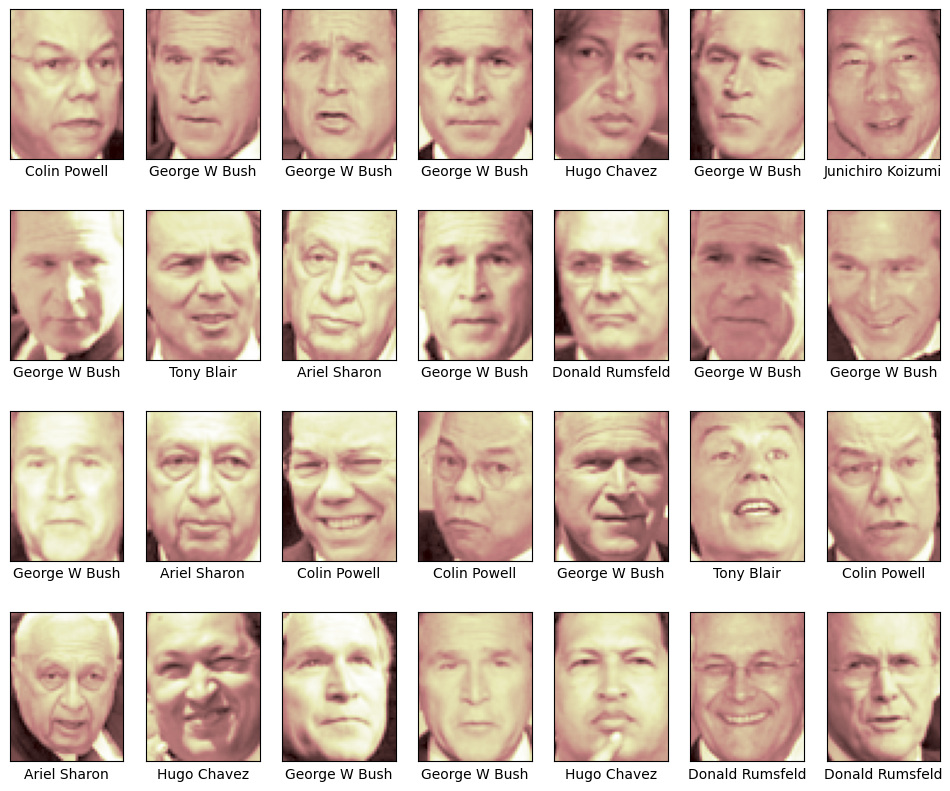

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import fetch_lfw_people # this will download␣

faces = fetch_lfw_people(min_faces_per_person=60) # you don't already have␣

fig, ax = plt.subplots(4, 7, figsize=(12, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='pink')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

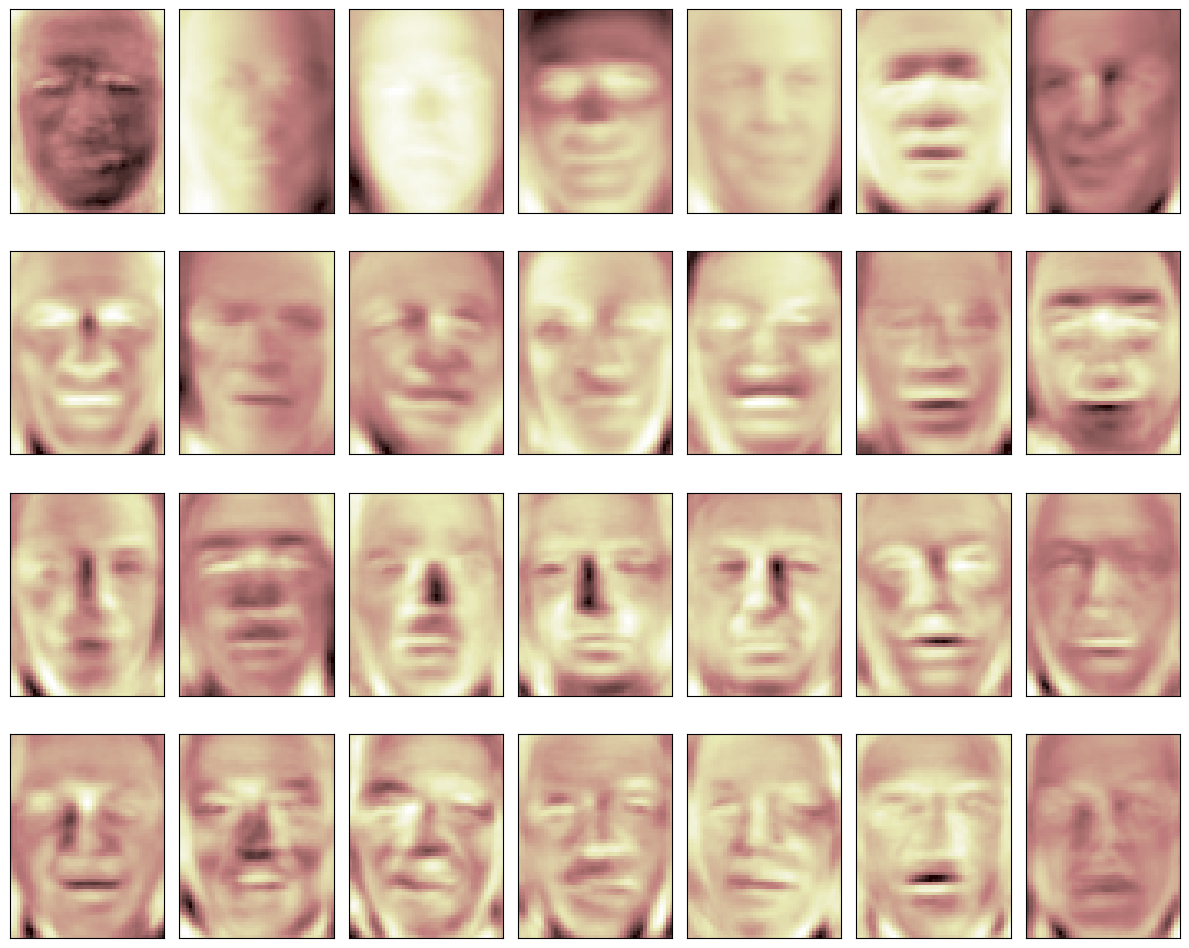

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people

# Download and load the LFW dataset
faces = fetch_lfw_people(min_faces_per_person=60)

# Reshape the images to vectors
faces_data = faces.data

# Perform PCA with the number of components equal to the number of eigenfaces to display
n_components = 28
pca = PCA(n_components=n_components)
pca.fit(faces_data)

# Get the eigenfaces
eigenfaces = pca.components_.reshape((n_components, faces.images.shape[1], faces.images.shape[2]))

# Display the first 28 eigenfaces
fig, ax = plt.subplots(4, 7, figsize=(12, 10))

for i, axi in enumerate(ax.flat):
    axi.imshow(eigenfaces[i], cmap='pink')
    axi.set(xticks=[], yticks=[])

plt.tight_layout()
plt.show()


In [26]:
# TASK 2

import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people

# Download and load the LFW dataset
faces = fetch_lfw_people(min_faces_per_person=60)
faces_data = faces.data

# Perform PCA to get singular values
pca = PCA()
pca.fit(faces_data)

# Calculate the Frobenius norm of the original matrix
frobenius_norm_original = np.linalg.norm(faces_data, 'fro')

# Set the threshold for relative error (5%)
relative_error_threshold = 0.05

# Find the number of components needed to achieve 5% relative error
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components_5_percent_error = np.argmax(cumulative_var_ratio >= 1 - relative_error_threshold) + 1

# Print the result
print(f"Number of components for 5% relative error: {n_components_5_percent_error}")


Number of components for 5% relative error: 184


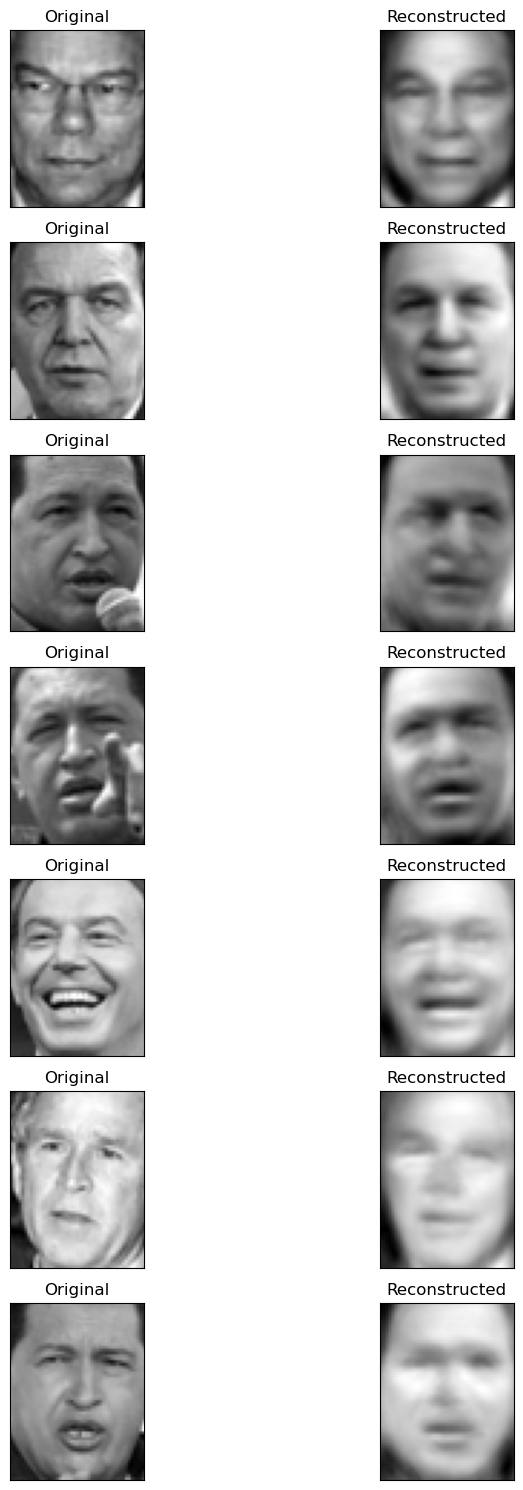

In [27]:
# TASK 3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people

# Download and load the LFW dataset
faces = fetch_lfw_people(min_faces_per_person=60)
faces_data = faces.data

# Number of eigenfaces to use (you can replace this with the value of N from Task 2)
N = 28

# Perform PCA with N components
pca = PCA(n_components=N)
pca.fit(faces_data[:-7])  # Exclude the last seven images

# Transform the last seven images using the eigenfaces
last_seven_images = faces_data[-7:]
reconstructed_last_seven = pca.inverse_transform(pca.transform(last_seven_images))

# Display the original and reconstructed images
fig, axes = plt.subplots(7, 2, figsize=(10, 15), subplot_kw={'xticks': [], 'yticks': []})

for i in range(7):
    axes[i, 0].imshow(last_seven_images[i].reshape(faces.images.shape[1], faces.images.shape[2]), cmap='gray')
    axes[i, 0].set_title('Original')
    
    axes[i, 1].imshow(reconstructed_last_seven[i].reshape(faces.images.shape[1], faces.images.shape[2]), cmap='gray')
    axes[i, 1].set_title('Reconstructed')

plt.tight_layout()
plt.show()


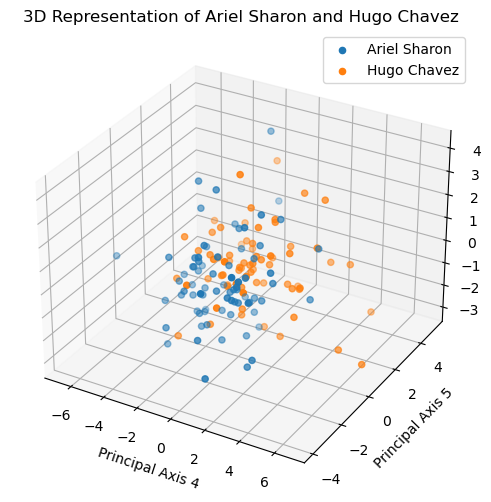

In [30]:
# TASK 4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people

# Download and load the LFW dataset
faces = fetch_lfw_people(min_faces_per_person=60)

# Extract the data and target labels
faces_data = faces.data
target_labels = faces.target
target_names = faces.target_names

# Select only images of Ariel Sharon and Hugo Chavez
selected_people = ['Ariel Sharon', 'Hugo Chavez']
selected_indices = [i for i, name in enumerate(target_names) if name in selected_people]

# Filter the data and target labels based on selected indices
selected_data = faces_data[np.isin(target_labels, selected_indices)]
selected_target_labels = target_labels[np.isin(target_labels, selected_indices)]

# Perform PCA with 7 components (using 4, 5, and 6 as principal axes)
pca = PCA(n_components=7)
pca.fit(selected_data)

# Transform the data using the selected principal axes
transformed_data = pca.transform(selected_data)

# Plot the points in 3D space
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different colors for each person
for i, name in enumerate(selected_people):
    indices = np.where(selected_target_labels == np.where(target_names == name)[0][0])
    ax.scatter(transformed_data[indices, 3], transformed_data[indices, 4], transformed_data[indices, 5], label=name)

# Set labels and title
ax.set_xlabel('Principal Axis 4')
ax.set_ylabel('Principal Axis 5')
ax.set_zlabel('Principal Axis 6')
ax.set_title('3D Representation of Ariel Sharon and Hugo Chavez')

# Add legend
ax.legend()

plt.show()
